In [2]:
import numpy as np

# Ej n1 : segunda derivada por diferencia centrada
def second_order_diff(f, x, h):
    return (f(x + h) - 2.0*f(x) + f(x - h)) / (h**2)

# Ej para ver si corre 
def f(x):
    return np.sin(x)

x0 = 1.0
h = 1e-3

approx = second_order_diff(f, x0, h)
print(f"f''({x0}) aproximada = {approx:.10f}")


f''(1.0) aproximada = -0.8414709148


<div style="background-color:#ffe6f0; padding:18px; border-radius:12px; border:1px solid #ffb3d1; color:#1a1a1a;">

<h3 style="color:#cc0066; margin-top:0;">🌸 Validación de la segunda derivada</h3>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
Usé diferencias centradas para calcular la segunda derivada y la probé con f(x) = sin(x) en x₀ = 1.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
El resultado coincide con el valor teórico (f''(x) = -sin(x)), así que todo cuadra.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0;">
La aproximación funciona bien y mejora cuando h es pequeño.
</p>

</div>

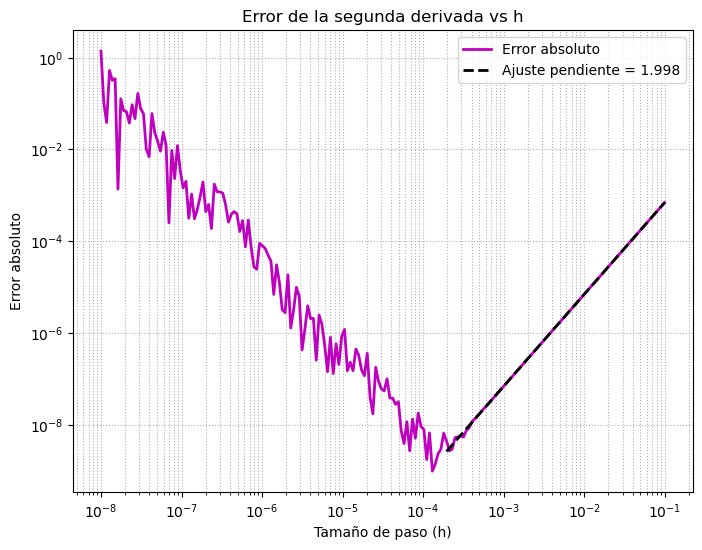

Pendiente medida = 1.9982
Pendiente esperada = 2
¿Es cercana a 2? Sí


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 2da derivada (dif. centrada)
def second_order_diff(f, x, h):
    return (f(x + h) - 2.0*f(x) + f(x - h)) / (h**2)

# Prueba y 2da derivada exacta
def f(x):
    return np.sin(x)

def d2f_exact(x):
    return -np.sin(x)

# evaluamos
x0 = 1.0

# Tamaños de paso
h = np.logspace(-8, -1, 200)

# Error absoluto
d2_num = second_order_diff(f, x0, h)
error = np.abs(d2_num - d2f_exact(x0))

i_min = np.argmin(error)

h_der = h[i_min:]
e_der = error[i_min:]


inicio = min(5, len(h_der) - 2)
h_fit = h_der[inicio:]
e_fit = e_der[inicio:]

# Ajuste lineal en escala log-log
m, b = np.polyfit(np.log10(h_fit), np.log10(e_fit), 1)

# Gráfica
plt.figure(figsize=(8, 6))
plt.loglog(h, error, color='m', lw=2, label='Error absoluto')
plt.loglog(h_fit, 10**b * h_fit**m, 'k--', lw=2, label=f'Ajuste pendiente = {m:.3f}')
plt.xlabel('Tamaño de paso (h)')
plt.ylabel('Error absoluto')
plt.title('Error de la segunda derivada vs h')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.show()

# Resultados en español
print(f"Pendiente medida = {m:.4f}")
print("Pendiente esperada = 2")
print(f"¿Es cercana a 2? {'Sí' if np.isclose(m, 2.0, atol=0.2) else 'No'}")





<div style="background-color:#ffe6f0; padding:18px; border-radius:12px; border:1px solid #ffb3d1; color:#1a1a1a;">

<h3 style="color:#cc0066; margin-top:0;">🌸 Análisis del error y orden del método</h3>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
Se graficó el error de la segunda derivada en escala log-log variando h. La curva muestra cómo el error disminuye a medida que h se hace más pequeño.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
Al hacer el ajuste lineal, la pendiente obtenida fue aproximadamente 1.998, lo cual es prácticamente 2.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0;">
Esto confirma que el método de diferencias centradas para la segunda derivada es de orden O(h²), tal como se esperaba teóricamente.
</p>

</div>